In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160


In [13]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df1 = df[['Close']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True)
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df1.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[51770.30201867 51797.28323467 51824.26445066 51851.24566666
 51878.22688266 51905.20809866 51932.18931465 51959.17053065
 51986.15174665 52013.13296265 52040.11417865 52067.09539464
 52094.07661064 52121.05782664 52148.03904264 52175.02025863
 52202.00147463 52228.98269063 52255.96390663 52282.94512263
 52309.92633862 52336.90755462 52363.88877062 52390.86998662
 52417.85120261 52444.83241861 52471.81363461 52498.79485061
 52525.77606661 52552.7572826 ]


**Đánh giá trên tập Test với tỉ lệ 5:3:2**

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)
print("R2: ", r2_test_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  34883.84648810712
MAE:  31713.882084534132
MAPE:  73.58548168813077
R2:  -4.743102464751865


**Đánh giá trên tập Test với tỉ lệ 6:2:2**

In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)
print("R2: ", r2_test_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  24380.447418725704
MAE:  22519.838460771836
MAPE:  46.91819569804031
R2:  -6.5224358035334875


**Đánh giá trên tập Test với tỉ lệ 7:2:1**

In [8]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse_test_arima = metrics.mean_squared_error(y_test, y_pred)
rmse_test_arima  = np.sqrt(mse_test_arima)
mae_test_arima  = metrics.mean_absolute_error(y_test, y_pred)
mape_test_arima  = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_test_arima  = r2_score(y_test, y_pred)

print("Chỉ số đánh giá hiệu suất trên tập dữ liệu test:")
print("RMSE: ", rmse_test_arima )
print("MAE: ", mae_test_arima)
print("MAPE: ", mape_test_arima * 100)
print("R2: ", r2_test_arima )

Chỉ số đánh giá hiệu suất trên tập dữ liệu test:
RMSE:  18199.80713623908
MAE:  15330.432877817726
MAPE:  60.32137122452386
R2:  -0.6738527731870703


**Nếu đang làm tỉ lệ 7:2:1 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.2 * len(df))
val_size1 = len(df) - train_size - test_size

train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

**Nếu đang làm tỉ lệ 6:2:2 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size2 = int(0.6 * len(df))
test_size2 = int(0.2 * len(df))
val_size2 = len(df) - train_size - test_size

train_data2 = df[:train_size]
test_data2 = df[train_size:train_size+test_size]
val_data2 = df[train_size+test_size:]

**Tạo khoảng giá trị thời gian bắt đầu từ ngày cuối cùng trong dataset + 1 cho đến 30 ngày tiếp theo dùng để làm giá trị trục x trong vẽ biểu đồ**

In [ ]:
from datetime import datetime, timedelta
start_date = datetime(2023, 4, 26)
end_date = datetime(2023, 5, 25)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST và Validate tỉ lệ 6:2:2**




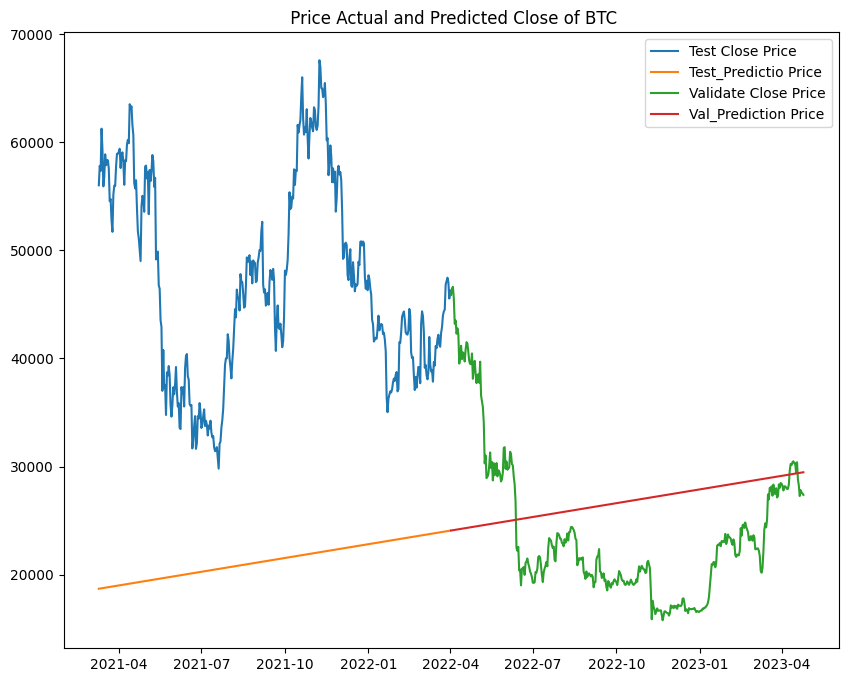

In [ ]:

# 9.Vẽ hình
plt.figure(figsize=(10, 8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data2.index,test_data['Close'], label='Test Close Price')
plt.plot(test_data2.index,y_pred, label='Test_Predictio Price')
plt.plot(val_data2.index,val_data['Close'], label='Validate Close Price')
plt.plot(val_data2.index,y_pred_val, label='Val_Prediction Price')
plt.legend()
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST và Validate tỉ lệ 7:2:1**




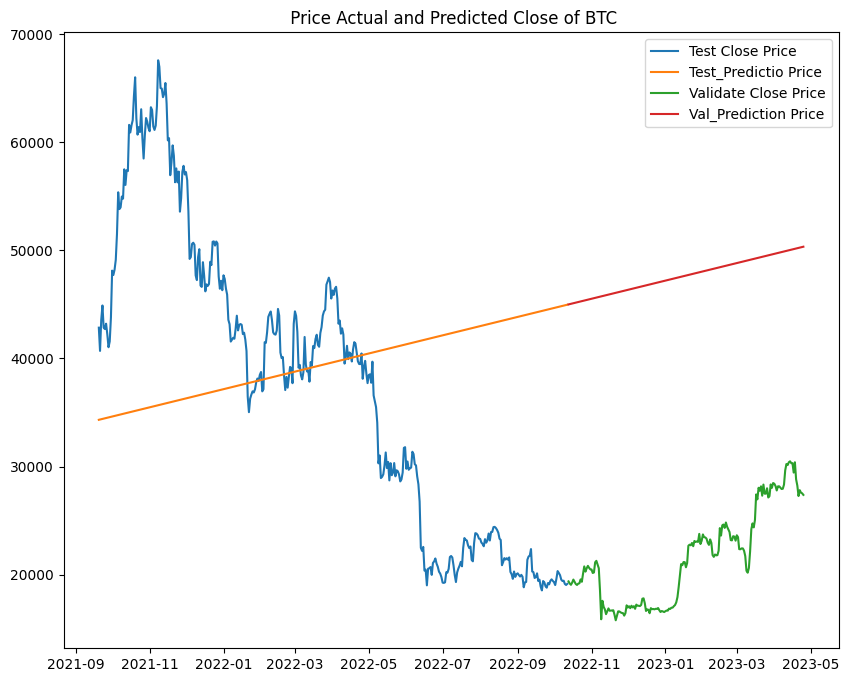

In [ ]:

# 9.Vẽ hình
plt.figure(figsize=(10, 8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data1.index,test_data['Close'], label='Test Close Price')
plt.plot(test_data1.index,y_pred, label='Test_Predictio Price')
plt.plot(val_data1.index,val_data['Close'], label='Validate Close Price')
plt.plot(val_data1 .index,y_pred_val, label='Val_Prediction Price')
plt.legend()
plt.show()

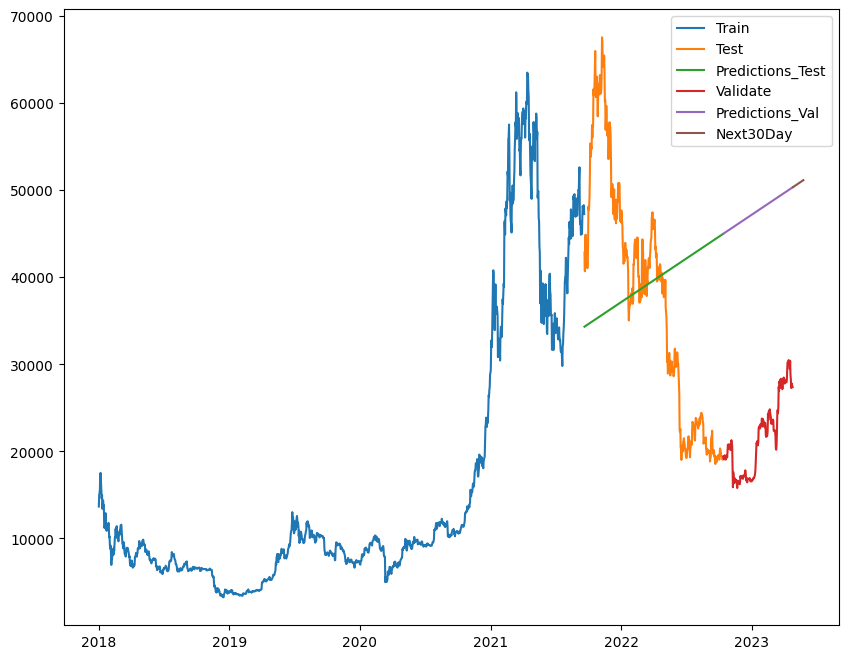

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data1.index, train_data['Close'])
plt.plot(test_data1.index, test_data['Close'])
plt.plot(test_data1.index, y_pred)
plt.plot(val_data1.index, val_data['Close'])
plt.plot(val_data1.index, y_pred_val)
plt.plot(dates,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)